In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


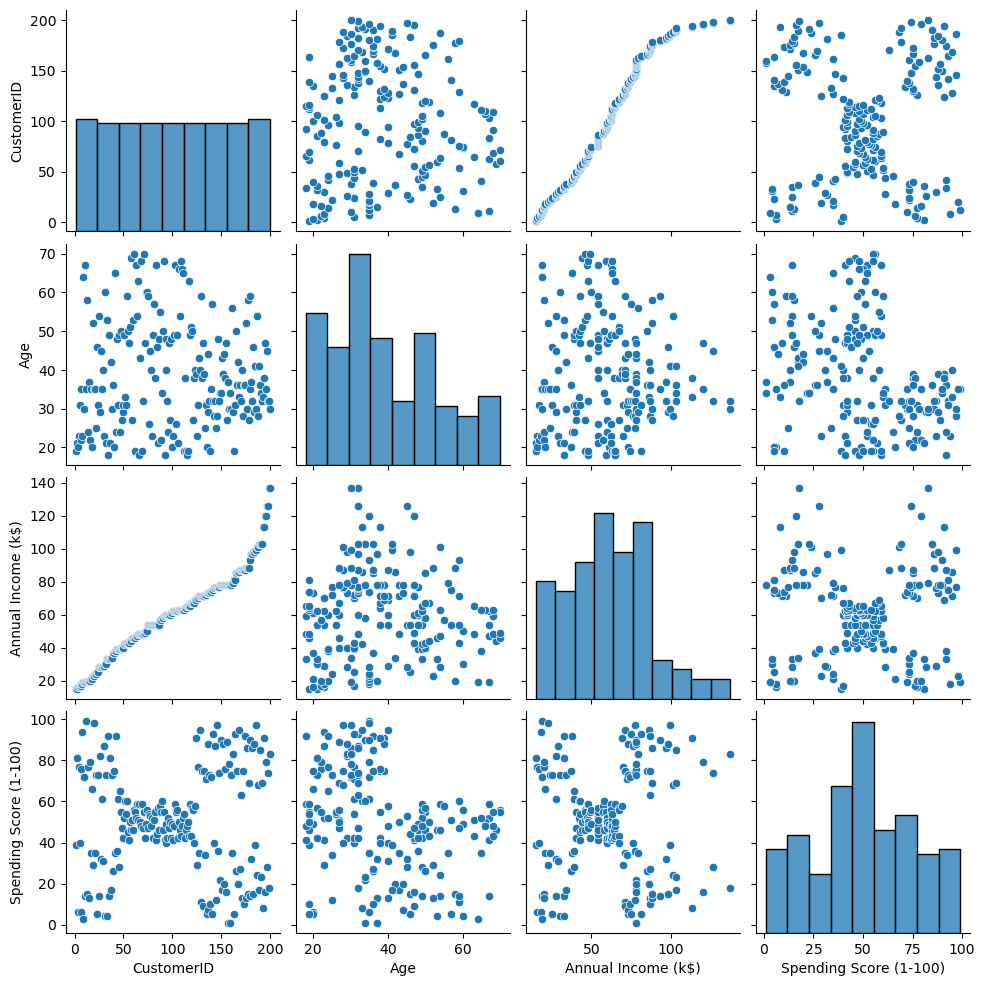

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
x=df.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [9]:
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [10]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[400.0,
 269.1425070447921,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.10377812115057,
 44.91118554999014,
 37.15135706793106,
 33.854106217363686,
 29.076176851244274]

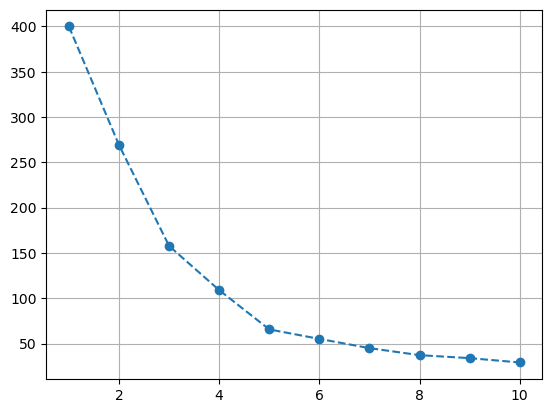

In [12]:
plt.plot(range(1,11),wcss,"o--")
plt.grid()
plt.show()

In [13]:
kmeans=KMeans(n_clusters=5,random_state=1)
ylabel=kmeans.fit_predict(x)

In [14]:
ylabel

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [15]:
df["yklabel"]=ylabel

In [16]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),yklabel
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [17]:
kmeans.cluster_centers_

array([[-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

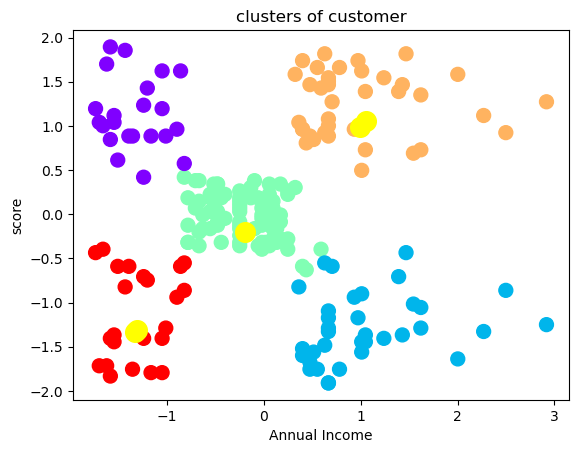

In [18]:
plt.scatter(x[:,0],x[:,1],c=ylabel,s=100,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,0],c="yellow",s=200)

plt.xlabel("Annual Income")
plt.ylabel("score")
plt.title("clusters of customer")
plt.show()

In [19]:
x=df.iloc[:,[3,4]]
y=df.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=True)

In [21]:
def dataset(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n")
    
    print(classification_report(ytest, ypred))
    return model

In [22]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [23]:
knn = dataset(KNeighborsClassifier())

Training Accuracy : 0.9714285714285714
Testing Accuracy : 0.9833333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [24]:
GNB = dataset(GaussianNB())

Training Accuracy : 0.9785714285714285
Testing Accuracy : 0.9833333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [25]:
LG = dataset(LogisticRegression())

Training Accuracy : 0.9928571428571429
Testing Accuracy : 0.95

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      0.91      0.95        11
           2       0.88      1.00      0.93        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.95        60
   macro avg       0.97      0.93      0.95        60
weighted avg       0.96      0.95      0.95        60

